## <center>CO3234 Pattern Recognition Assignment-1</center> 

<center>by Siddhant Verma - 2K18/EC/167 
</center> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [3]:
!ls

BankNote_Authentication.csv  q1.ipynb		     t10k-labels.idx1-ubyte
pattern.ipynb		     q2.ipynb		     train-images.idx3-ubyte
pattern2.ipynb		     t10k-images.idx3-ubyte  train-labels.idx1-ubyte


### Importing Dataset as Dataframe

In [2]:
df = pd.read_csv('./BankNote_Authentication.csv')

df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Data Visualization and Exploration

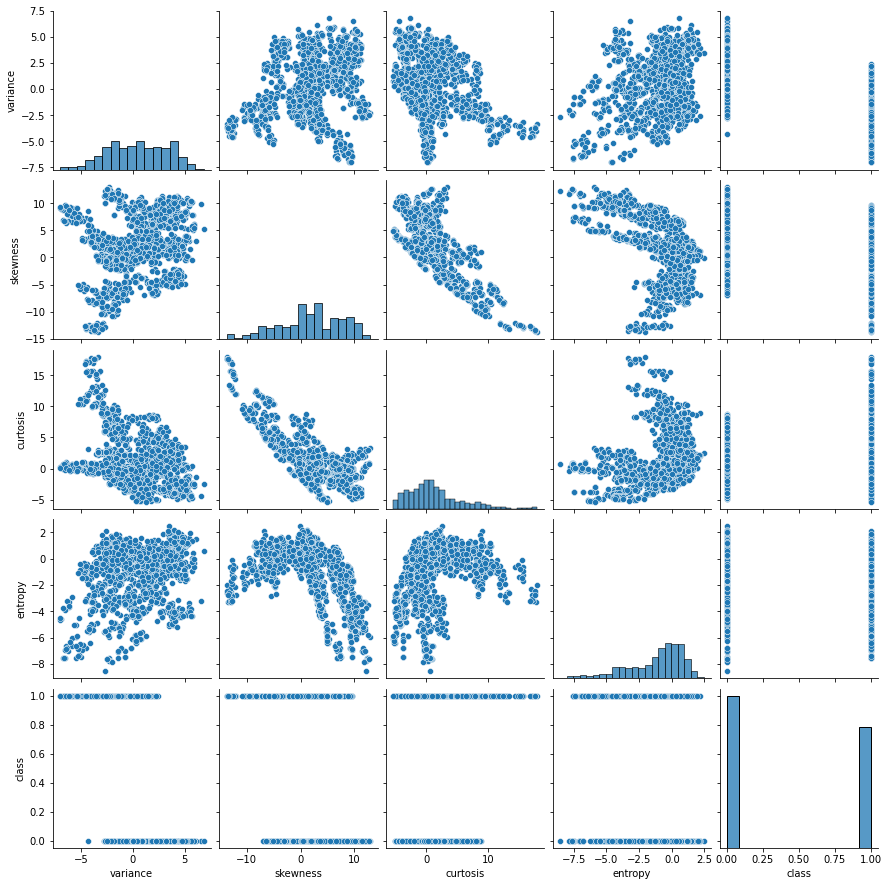

In [3]:
sns.pairplot(df)
plt.savefig('pairplot.png')

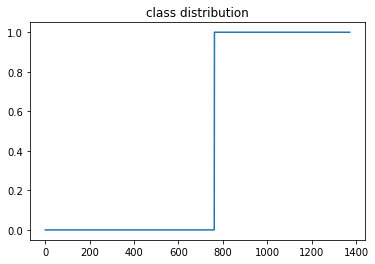

In [4]:
plt.plot(df['class'])
plt.title('class distribution')
plt.savefig('cd.png')

### Separating the target variable from the Dataset

In [5]:
X = df.iloc[:, :4]
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [6]:
Y = df.iloc[:,4].values
Y

array([0, 0, 0, ..., 1, 1, 1])

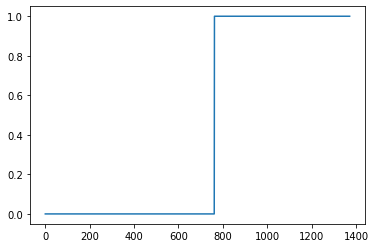

In [9]:
plt.plot(Y)

### Prior Probability of both classes

In [10]:
unique, counts = np.unique(df['class'], return_counts=True)
counts

print(f"Dataset:\nPrior Probability of Genuine Class is : {counts[0]/1372}\nPrior Probability of Forged Class is : {counts[1]/1372}")

Dataset:
Prior Probability of Genuine Class is : 0.5553935860058309
Prior Probability of Forged Class is : 0.4446064139941691


### Test-Train Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=40)

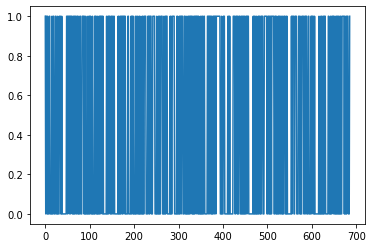

In [8]:
plt.plot(y_train)

In [13]:
unique, counts = np.unique(y_test, return_counts=True)
counts

print(f"After Splitting:\nPrior Probability of Genuine Class is : {counts[0]*2/1372}\nPrior Probability of Forged Class is : {counts[1]*2/1372}")

After Splitting:
Prior Probability of Genuine Class is : 0.5568513119533528
Prior Probability of Forged Class is : 0.44314868804664725


### Building the classifier

In [9]:
model = GaussianNB()

In [10]:
fit = model.fit(X_train, y_train)

In [11]:
predictions = fit.predict(X_test)
con_matrix = confusion_matrix(y_test, predictions)

print(con_matrix)

[[340  42]
 [ 61 243]]


In [12]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion Matrix

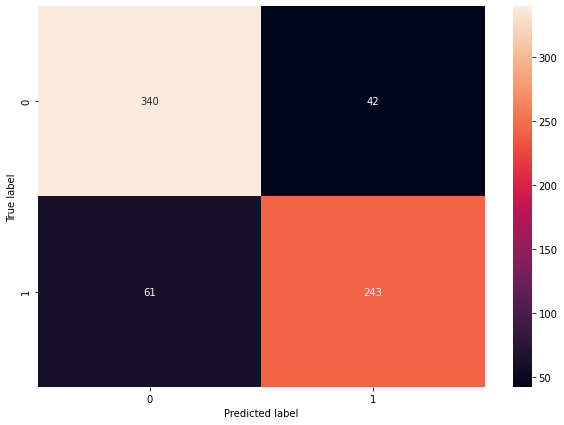

In [13]:
draw_confusionmatrix(y_test, predictions)
plt.savefig('cm-5050.png')

In [14]:
def diag_sum(conmat):
    sum =0
    for i in range(len(conmat)):
        for j in range(len(conmat[0])):
            if i == j:
                sum += conmat[i,j]
    return sum

### Accuracy

In [15]:
accurate = diag_sum(con_matrix)
total = np.sum(con_matrix)
acc = accurate/total
print(f"accuracy = {accurate}/{total} = {acc*100}%")

accuracy = 583/686 = 84.98542274052478%


In [16]:
probs = fit.predict_proba(X_test)
preds = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, preds)

### ROC Curve

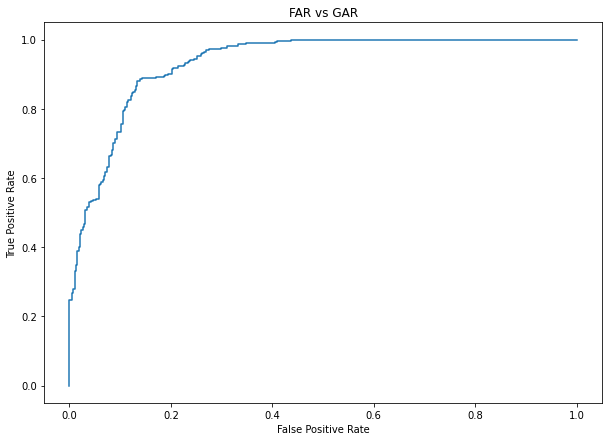

In [17]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('FAR vs GAR')
plt.savefig('roc5050.png')

In [18]:
auc = roc_auc_score(y_test, preds)
print(f"AUC: {auc*100}%")

AUC: 93.26346789749242%


### Splitting the data such that 90% is genuine (class 0) and 10% is forged (class 1)

In [19]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [20]:
uniques, counts = np.unique(df['class'], return_counts=True) 

counts

array([762, 610])

In [21]:
df = df[:846]

In [22]:
uniques, counts = np.unique(df['class'], return_counts=True) 

ratio = counts[0]/np.sum(counts)

print(f"After Redistribution\nPrior Probability of Genuine class = {ratio}\nPrior Probability of Forged Class = {1-ratio}")

After Redistribution
Prior Probability of Genuine class = 0.900709219858156
Prior Probability of Forged Class = 0.099290780141844


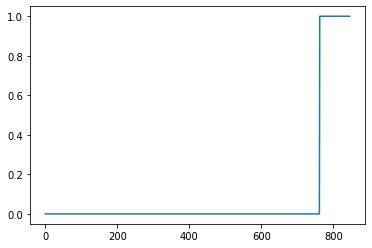

In [23]:
plt.plot(df['class'])
plt.savefig('cd9010.png')

### Data Splitting

In [24]:
X = df.iloc[:, :4]
X

,variance,skewness,curtosis,entropy
0,3.621600,8.66610,-2.80730,-0.44699
1,4.545900,8.16740,-2.45860,-1.46210
2,3.866000,-2.63830,1.92420,0.10645
3,3.456600,9.52280,-4.01120,-3.59440
4,0.329240,-4.45520,4.57180,-0.98880
...,...,...,...,...
841,-3.885800,-12.84610,12.79570,-3.13530
842,-1.896900,-6.78930,5.27610,-0.32544
843,-0.526450,-0.24832,-0.45613,0.41938
844,0.009661,3.56120,-4.40700,-4.41030


In [25]:
Y = df.iloc[:,4].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=40)

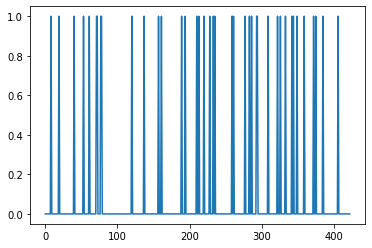

In [27]:
plt.plot(y_train)

### Building the bayes classifier

In [28]:
model = GaussianNB()

In [29]:
fit = model.fit(X_train, y_train)

In [30]:
predictions = fit.predict(X_test)
con_matrix = confusion_matrix(y_test, predictions)

print(con_matrix)

[[372   7]
 [ 22  22]]


### Confusion Matrix

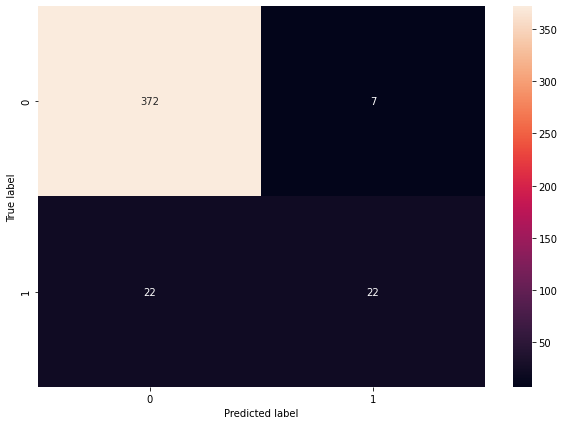

In [33]:
draw_confusionmatrix(y_test, predictions)
plt.savefig('cm9010.png')

### Accuracy

In [34]:
accurate = diag_sum(con_matrix)
total = np.sum(con_matrix)
acc = accurate/total
print(f"accuracy = {accurate}/{total} = {acc*100}%")

accuracy = 394/423 = 93.14420803782507%


In [35]:
probs = fit.predict_proba(X_test)
preds = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, preds)

### ROC Curve

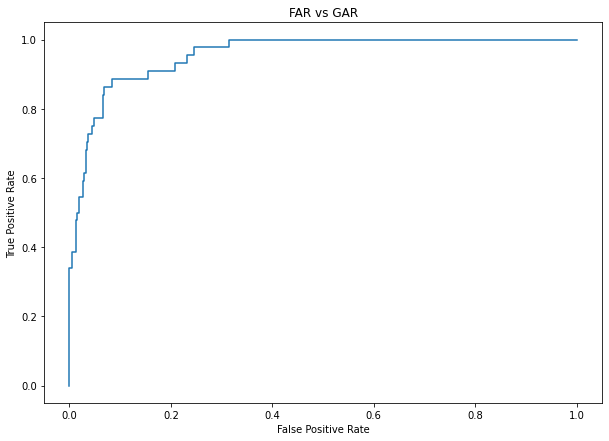

In [36]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('FAR vs GAR')
plt.savefig('roc9010.png')

In [37]:
auc = roc_auc_score(y_test, preds)
print(f"AUC: {auc*100}%")

AUC: 95.53849844087311%
